<a href="https://colab.research.google.com/github/yleessam/2501_dl_env_colab/blob/main/8_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#DNN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax' )]
)


In [7]:
#CNN - Sequential
from tensorflow.keras import Sequential, layers
model1 = Sequential([
    layers.Input(shape=(28,28,1)),
    #1차 컨볼루션
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    #2차 컨볼루션
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    #3. 분류모델에 넣어주기
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    #4. 다중분류 - 확률 출력
    layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# 교재 283페이지 Mnist CNN

In [3]:
#CNN - 함수형API

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1))

#1차 컨볼루션
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs) #class.__caller__() > model.build() 호출
x = layers.MaxPooling2D()(x)

#2차 컨볼루션
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x) #class.__caller__() > model.build() 호출
x = layers.MaxPooling2D()(x)

#3차 컨볼루션
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) #class.__caller__() > model.build() 호출
x = layers.Flatten()(x)

#4. 다중분류 - 확률 출력
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 전처리
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 #0~1사이로 스케일링
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

#컴파일
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", #다중분류
    metrics=["accuracy"])

#학습
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8862 - loss: 0.3697
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9850 - loss: 0.0483
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0307
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0218
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9950 - loss: 0.0160


In [16]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'Loss: {loss:.6f}, Accuracy: {accuracy:.6f}')

Loss: 0.025638, Accuracy: 0.992800


# Mnist Sequential Model

In [14]:
#컴파일
model1.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", #다중분류
    metrics=["accuracy"])

#학습
hist = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9884 - loss: 0.0413 - val_accuracy: 0.9910 - val_loss: 0.0287
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9885 - loss: 0.0416 - val_accuracy: 0.9911 - val_loss: 0.0283
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0399 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9924 - val_loss: 0.0234
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0399 - val_accuracy: 0.9913 - val_loss: 0.0285


In [15]:
loss, accuracy = model1.evaluate(test_images, test_labels, verbose=0)
print(f'Loss: {loss:.6f}, Accuracy: {accuracy:.6f}')

Loss: 0.028473, Accuracy: 0.991300


KeyError: 'val_loss'

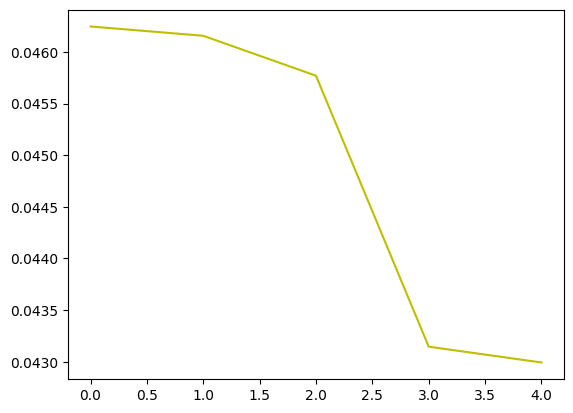

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()